In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")

No need to split data. Data are already splited in two parts.

In [3]:
titanic = train_data.copy()

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.drop(['PassengerId', "Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [8]:
titanic.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
Embarked    0.002245
dtype: float64

In [9]:
titanic.shape

(891, 5)

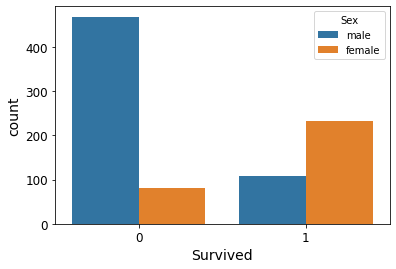

In [10]:
import seaborn as sns

sns.countplot(x="Survived", hue="Sex", data=titanic)
plt.show()

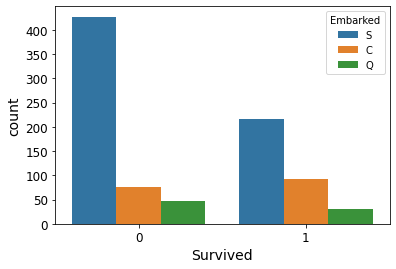

In [11]:
sns.countplot(x="Survived", hue="Embarked", data=titanic)
plt.show()

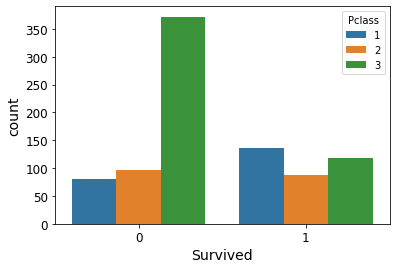

In [12]:
sns.countplot(x="Survived", hue="Pclass", data=titanic)
plt.show()

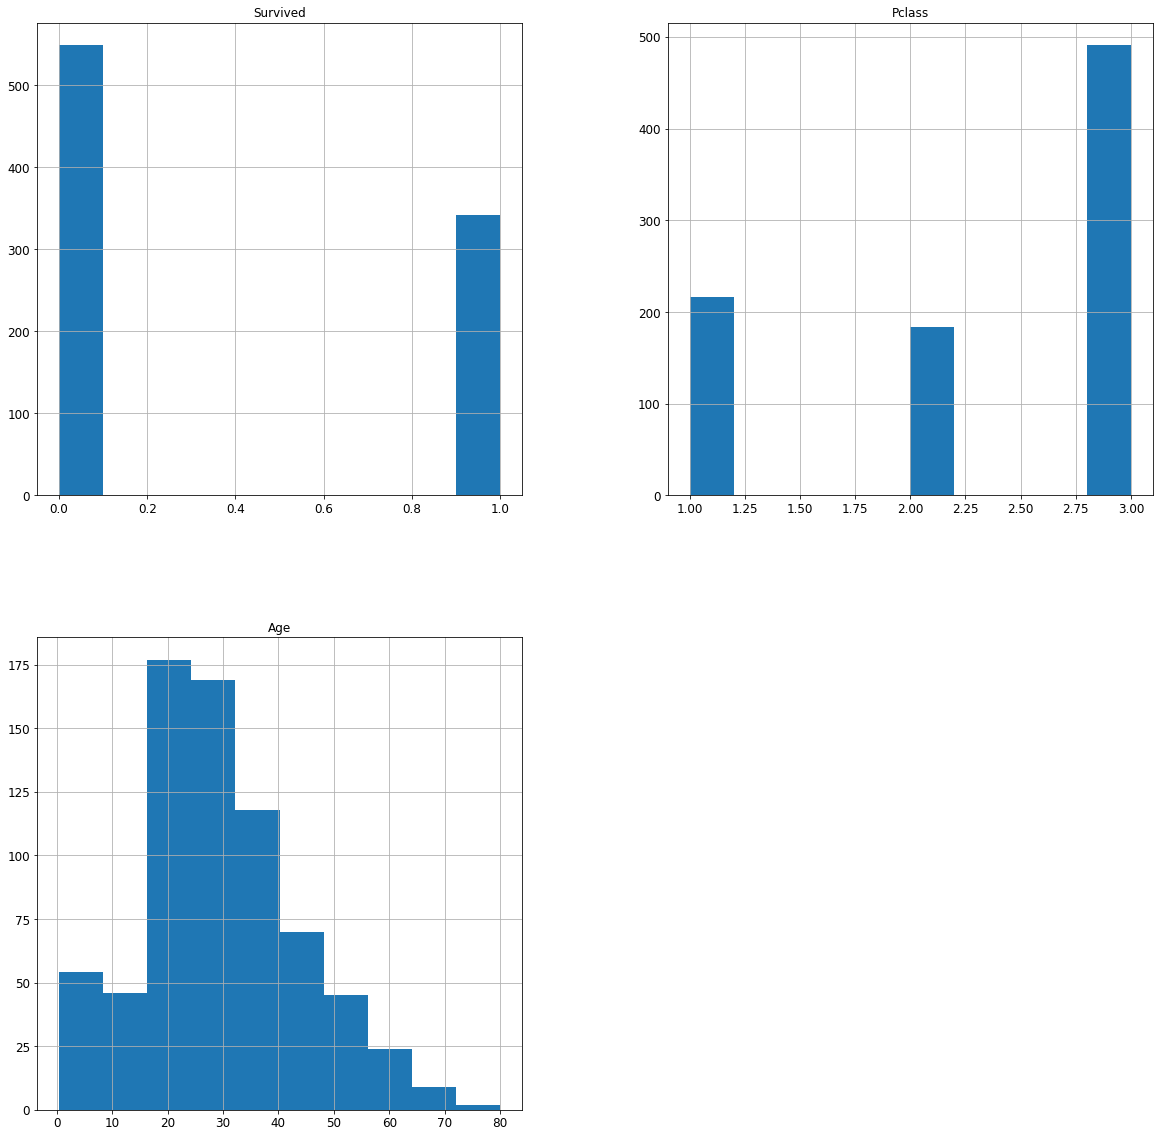

In [13]:
import warnings
warnings.filterwarnings("ignore")

titanic.hist(figsize=(20,20))
plt.show()

In [14]:
corr_matrix = titanic.corr()

In [15]:
corr_matrix

,Survived,Pclass,Age
Survived,1.000000,-0.338481,-0.077221
Pclass,-0.338481,1.000000,-0.369226
Age,-0.077221,-0.369226,1.000000


In [16]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

# Prepare the data for Machine Learning Algorithms

## Data Cleaning

In [17]:
titanic = titanic.drop('Survived', axis=1)
titanic_labels = train_data['Survived'].copy()

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
titanic_num = titanic.drop(["Pclass", "Embarked", "Sex"], axis=1)
imputer.fit(titanic_num)
imputer.statistics_

array([28.])

In [19]:
X = imputer.fit_transform(titanic_num)
titanic_tr = pd.DataFrame(X, columns=titanic_num.columns)

## Categorial and text data

In [20]:
titanic_cat = titanic[["Sex", "Pclass", "Embarked"]]

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)

## Feature Scaling

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(titanic_tr)

array([[-0.46153846],
       [ 0.76923077],
       [-0.15384615],
       [ 0.53846154],
       [ 0.53846154],
       [ 0.        ],
       [ 2.        ],
       [-2.        ],
       [-0.07692308],
       [-1.07692308],
       [-1.84615385],
       [ 2.30769231],
       [-0.61538462],
       [ 0.84615385],
       [-1.07692308],
       [ 2.07692308],
       [-2.        ],
       [ 0.        ],
       [ 0.23076923],
       [ 0.        ],
       [ 0.53846154],
       [ 0.46153846],
       [-1.        ],
       [ 0.        ],
       [-1.53846154],
       [ 0.76923077],
       [ 0.        ],
       [-0.69230769],
       [ 0.        ],
       [ 0.        ],
       [ 0.92307692],
       [ 0.        ],
       [ 0.        ],
       [ 2.92307692],
       [ 0.        ],
       [ 1.07692308],
       [ 0.        ],
       [-0.53846154],
       [-0.76923077],
       [-1.07692308],
       [ 0.92307692],
       [-0.07692308],
       [ 0.        ],
       [-1.92307692],
       [-0.69230769],
       [ 0

In [23]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())])
    
titanic_num_tr = num_pipeline.fit_transform(titanic_num)

## Pipeline

In [24]:
from sklearn.compose import ColumnTransformer

num_attribs = list(titanic_num)
cat_attribs = ["Sex", "Pclass", "Embarked"]

pipeline_preparation = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

titanic_transformed = pipeline_preparation.fit_transform(titanic)

# Select and train a model

## SGD Classifier

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(titanic_transformed, titanic_labels)

SGDClassifier()

In [26]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(sgd_clf, titanic_transformed, titanic_labels, cv=5, scoring="accuracy")

In [27]:
cross_val.mean()

0.8103320569957944

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, titanic_transformed, titanic_labels, cv=5)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(titanic_labels, y_train_pred)

array([[448, 101],
       [110, 232]])

In [30]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print('Precision: ', precision_score(titanic_labels, y_train_pred))
print('Recall:', recall_score(titanic_labels, y_train_pred))
print('F1 Score:', f1_score(titanic_labels, y_train_pred))

Precision:  0.6966966966966966
Recall: 0.6783625730994152
F1 Score: 0.6874074074074074


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(titanic_transformed, titanic_labels)

LogisticRegression()

In [32]:
cross_val = cross_val_score(log_reg, titanic_transformed, titanic_labels, cv=5, scoring="accuracy")

In [33]:
cross_val.mean()

0.7890151277383718

In [34]:
y_train_pred = cross_val_predict(log_reg, titanic_transformed, titanic_labels, cv=5)

In [35]:
confusion_matrix(titanic_labels, y_train_pred)

array([[465,  84],
       [104, 238]])

In [36]:
print('Precision: ', precision_score(titanic_labels, y_train_pred))
print('Recall:', recall_score(titanic_labels, y_train_pred))
print('F1 Score:', f1_score(titanic_labels, y_train_pred))

Precision:  0.7391304347826086
Recall: 0.695906432748538
F1 Score: 0.716867469879518


## kNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_transformed, titanic_labels)

KNeighborsClassifier()

In [38]:
cross_val = cross_val_score(knn_clf, titanic_transformed, titanic_labels, cv=5, scoring="accuracy")

In [39]:
cross_val.mean()

0.8036218693114054

In [40]:
y_train_pred = cross_val_predict(knn_clf, titanic_transformed, titanic_labels, cv=5)

In [41]:
confusion_matrix(titanic_labels, y_train_pred)

array([[475,  74],
       [101, 241]])

In [42]:
print('Precision: ', precision_score(titanic_labels, y_train_pred))
print('Recall:', recall_score(titanic_labels, y_train_pred))
print('F1 Score:', f1_score(titanic_labels, y_train_pred))

Precision:  0.765079365079365
Recall: 0.7046783625730995
F1 Score: 0.7336377473363775


## SVM Classifier

In [43]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(titanic_transformed, titanic_labels)

SVC(gamma='auto')

In [44]:
cross_val = cross_val_score(svm_clf, titanic_transformed, titanic_labels, cv=5, scoring="accuracy")

In [45]:
cross_val.mean()

0.7878475927437072

In [46]:
y_train_pred = cross_val_predict(svm_clf, titanic_transformed, titanic_labels, cv=5)

In [47]:
confusion_matrix(titanic_labels, y_train_pred)

array([[481,  68],
       [121, 221]])

In [48]:
print('Precision: ', precision_score(titanic_labels, y_train_pred))
print('Recall:', recall_score(titanic_labels, y_train_pred))
print('F1 Score:', f1_score(titanic_labels, y_train_pred))

Precision:  0.7647058823529411
Recall: 0.6461988304093568
F1 Score: 0.7004754358161648


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(titanic_transformed, titanic_labels)

RandomForestClassifier()

In [50]:
cross_val = cross_val_score(rf_clf, titanic_transformed, titanic_labels, cv=5, scoring="accuracy")

In [51]:
cross_val.mean()

0.804758018956751

In [52]:
y_train_pred = cross_val_predict(rf_clf, titanic_transformed, titanic_labels, cv=5)

In [53]:
confusion_matrix(titanic_labels, y_train_pred)

array([[475,  74],
       [100, 242]])

In [54]:
print('Precision: ', precision_score(titanic_labels, y_train_pred))
print('Recall:', recall_score(titanic_labels, y_train_pred))
print('F1 Score:', f1_score(titanic_labels, y_train_pred))

Precision:  0.7658227848101266
Recall: 0.7076023391812866
F1 Score: 0.7355623100303952


Best model seems to be kNN or RandomForest

# Finetune your model

Finetuning : kNN

In [55]:
from sklearn.model_selection import GridSearchCV

params_grid = [{'weights': ["uniform", "distance"], 
                'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, params_grid, cv=5, verbose=3)
grid_search.fit(titanic_transformed, titanic_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................n_neighbors=3, weights=uniform; total time=   0.0s
[CV 2/5] END .................n_neighbors=3, weights=uniform; total time=   0.0s
[CV 3/5] END .................n_neighbors=3, weights=uniform; total time=   0.0s
[CV 4/5] END .................n_neighbors=3, weights=uniform; total time=   0.0s
[CV 5/5] END .................n_neighbors=3, weights=uniform; total time=   0.0s
[CV 1/5] END ................n_neighbors=3, weights=distance; total time=   0.0s
[CV 2/5] END ................n_neighbors=3, weights=distance; total time=   0.0s
[CV 3/5] END ................n_neighbors=3, weights=distance; total time=   0.0s
[CV 4/5] END ................n_neighbors=3, weights=distance; total time=   0.0s
[CV 5/5] END ................n_neighbors=3, weights=distance; total time=   0.0s
[CV 1/5] END .................n_neighbors=4, weights=uniform; total time=   0.0s
[CV 2/5] END .................n_neighbors=4, weig

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [56]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [57]:
grid_search.best_score_

0.8036218693114054

In [58]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(titanic_transformed)
accuracy_score(titanic_labels, y_pred)

0.8518518518518519

In [59]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", pipeline_preparation),
        ("knn", KNeighborsClassifier(n_neighbors = 5, weights = "uniform"))
    ])

full_pipeline_with_predictor.fit(titanic, titanic_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])])),
                ('knn', KNeighborsClassifier())])

# Predictions

In [60]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
test_data.drop(['PassengerId', "Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
predict = full_pipeline_with_predictor.predict(test_data)

In [62]:
predict

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,